In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.datasets import make_blobs

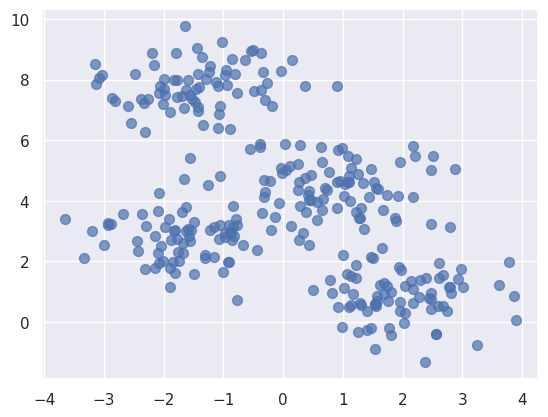

In [4]:
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)

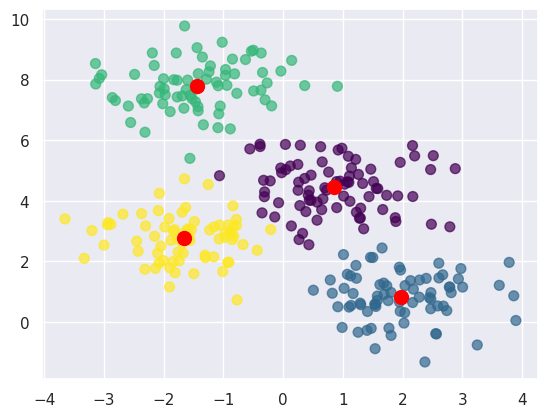

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

# Determining right number of clusters by 'elbow' method:
- choosing the sharpest angle of elbows curve

Text(0, 0.5, 'Inertia')

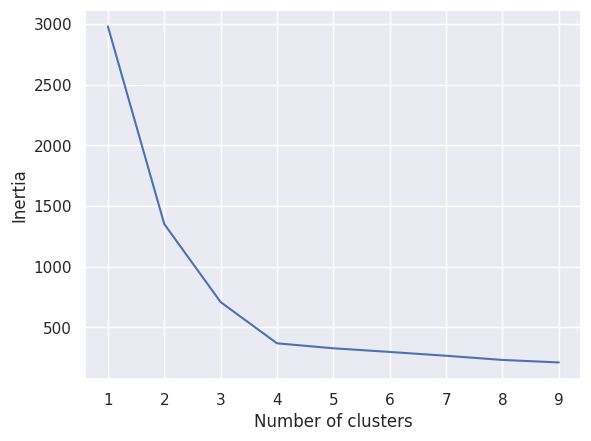

In [6]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Applying k-Means Clustering to Customer Data

In [7]:
import pandas as pd

customers = pd.read_csv('/home/mikepi/Coding/Excs/ml_ai_for_engineers_prosise_j/data/customers.csv')

In [8]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
customers.shape

(200, 5)

Text(0, 0.5, 'Spending Score')

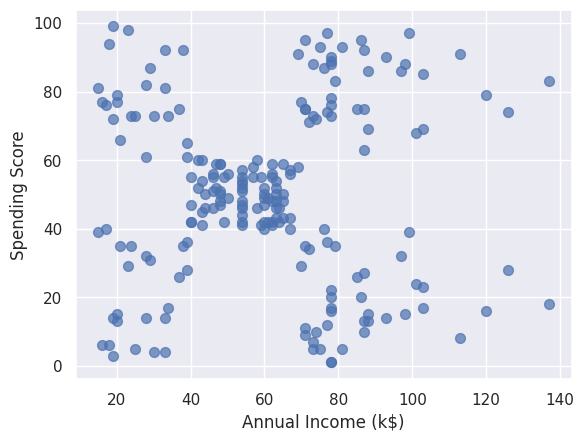

In [10]:
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')


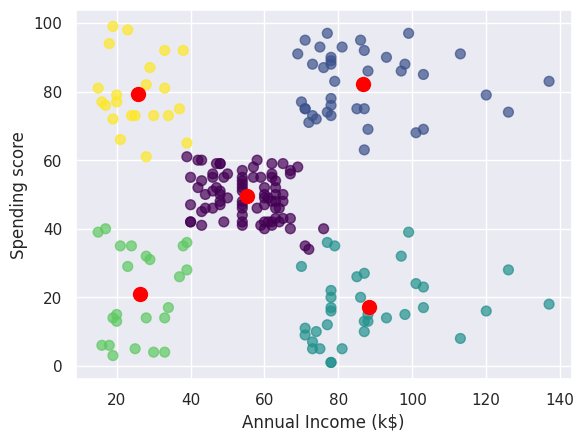

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='red', s=100)

In [12]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


## Filtering customers with high income and low spending score for future targeting

In [13]:
import numpy as np 

#  get desireable cluster index (high income and low spending)
cluster = kmeans.predict(np.array([[120, 20]]))[0]

clustered_df = df[df['Cluster'] == cluster]
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

In [14]:
clustered_df['Annual Income (k$)'].values

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [15]:
clustered_df['Spending Score (1-100)'].values

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

In [16]:
np.array([[120, 20]])

array([[120,  20]])

In [17]:
df[df['CustomerID'] == 199]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
198,199,Male,32,137,18,2


In [18]:
points.shape

(200, 2)

## Segmenting Customers Using More Than Two Dimensions

In [19]:
from sklearn.preprocessing import LabelEncoder
df = customers.copy()
encoder = LabelEncoder()
df['Gender'] =encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'Inertia')

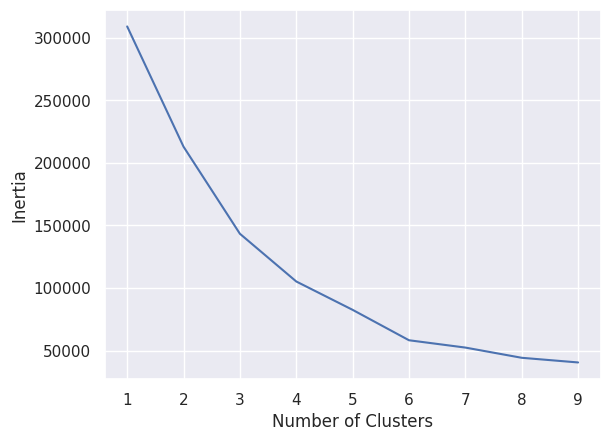

In [21]:
points = df.iloc[:, 1:5].values
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [35]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


## Creating new dataframe reflecting mean values of each cluster

In [36]:
results = pd.DataFrame(columns=['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]
    income = center[2]
    spend = center[3]
    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of females,Number of Males
0,0.0,54.060000,40.460000,36.720000,28.0,22.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,25.250000,25.833333,76.916667,14.0,10.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,33.396226,58.056604,48.773585,34.0,19.0
